# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter 

# Read in data summary & text data

In [2]:
df = pd.read_csv('./data/working_data/chapter_summaries_texts.csv')
df.head()

,chapter_title,chapter_summary,book_title,chapters,chapter_text
0,The Age of Innocence: Novel Summary: Chapters 1-3,Chapters 1-3\n\n\t \nSummary\n\tThe story open...,The Age of Innocence,Chapters 1-3,The Age of InnocencebyEdith Wharton\n\n\n\n\n\...
1,The Age of Innocence: Novel Summary: Chapters 4-6,Chapters 4-6\nSummary\n\tArcher and May begin ...,The Age of Innocence,Chapters 4-6,\n\nIn the course of the next day the first of...
2,The Age of Innocence: Novel Summary: Chapters 7-9,Chapters 7-9\nSummary\n\tMrs Archer and her so...,The Age of Innocence,Chapters 7-9,\n\nMrs. Henry van der Luyden listened in sile...
3,The Age of Innocence: Novel Summary: Chapters ...,Chapters 10-12\nSummary\n\tArcher tells May ab...,The Age of Innocence,Chapters 10-12,"\n\nThe Countess Olenska had said ""after five""..."
4,The Age of Innocence: Novel Summary: Chapters ...,"Chapters 13-15\nSummary\n\tAt the theatre, Arc...",The Age of Innocence,Chapters 13-15,\n\nIt was a crowded night at Wallack's theatr...


# Double check for missing values

In [3]:
df.isna().sum()

chapter_title      0
chapter_summary    0
book_title         0
chapters           0
chapter_text       0
dtype: int64

# Remove '\n' and '\t' from texts

In [4]:
#In chapter summaries and texts - replace '\n' , '\t' with a space, then replace double, triple, or quadruple spaces with a signle space

to_replace = ['\n', '\t', '  ', '   ', '    ']

for i in df.index:
    for char in to_replace:
        df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(char, ' ')
        df.iloc[i]['chapter_text'] = df.iloc[i]['chapter_text'].replace(char, ' ')

In [5]:
df.head()

,chapter_title,chapter_summary,book_title,chapters,chapter_text
0,The Age of Innocence: Novel Summary: Chapters 1-3,Chapters 1-3 Summary The story opens at the...,The Age of Innocence,Chapters 1-3,The Age of InnocencebyEdith Wharton Etext prep...
1,The Age of Innocence: Novel Summary: Chapters 4-6,Chapters 4-6 Summary Archer and May begin thei...,The Age of Innocence,Chapters 4-6,In the course of the next day the first of th...
2,The Age of Innocence: Novel Summary: Chapters 7-9,Chapters 7-9 Summary Mrs Archer and her son ca...,The Age of Innocence,Chapters 7-9,Mrs. Henry van der Luyden listened in silence...
3,The Age of Innocence: Novel Summary: Chapters ...,Chapters 10-12 Summary Archer tells May about ...,The Age of Innocence,Chapters 10-12,"The Countess Olenska had said ""after five""; a..."
4,The Age of Innocence: Novel Summary: Chapters ...,"Chapters 13-15 Summary At the theatre, Archer ...",The Age of Innocence,Chapters 13-15,It was a crowded night at Wallack's theatre. ...


# Remove other unneeded words

## Remove book titles from chapter summaries and texts

In [6]:
for i in df.index:
    book_title = df.iloc[i]['book_title']
    if book_title in df.iloc[i]['chapter_summary']:
        df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(book_title, ' ')
    if book_title in df.iloc[i]['chapter_text']:
        df.iloc[i]['chapter_text'] = df.iloc[i]['chapter_text'].replace(book_title, ' ')

In [7]:
df.head()

,chapter_title,chapter_summary,book_title,chapters,chapter_text
0,The Age of Innocence: Novel Summary: Chapters 1-3,Chapters 1-3 Summary The story opens at the...,The Age of Innocence,Chapters 1-3,"byEdith Wharton Etext prepared by JudithBoss,..."
1,The Age of Innocence: Novel Summary: Chapters 4-6,Chapters 4-6 Summary Archer and May begin thei...,The Age of Innocence,Chapters 4-6,In the course of the next day the first of th...
2,The Age of Innocence: Novel Summary: Chapters 7-9,Chapters 7-9 Summary Mrs Archer and her son ca...,The Age of Innocence,Chapters 7-9,Mrs. Henry van der Luyden listened in silence...
3,The Age of Innocence: Novel Summary: Chapters ...,Chapters 10-12 Summary Archer tells May about ...,The Age of Innocence,Chapters 10-12,"The Countess Olenska had said ""after five""; a..."
4,The Age of Innocence: Novel Summary: Chapters ...,"Chapters 13-15 Summary At the theatre, Archer ...",The Age of Innocence,Chapters 13-15,It was a crowded night at Wallack's theatre. ...


## Remove chapter titles from chapter summaries

In [8]:
for i in df.index:
    chapter_title = df.iloc[i]['chapter_title']
    chapters = df.iloc[i]['chapters']
    if chapter_title in df.iloc[i]['chapter_summary']:
        df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(chapter_title, ' ')
    if chapters in df.iloc[i]['chapter_summary']:
        df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(chapters, ' ')  

In [9]:
df.head()

,chapter_title,chapter_summary,book_title,chapters,chapter_text
0,The Age of Innocence: Novel Summary: Chapters 1-3,Summary The story opens at the opera in N...,The Age of Innocence,Chapters 1-3,"byEdith Wharton Etext prepared by JudithBoss,..."
1,The Age of Innocence: Novel Summary: Chapters 4-6,Summary Archer and May begin their round of ...,The Age of Innocence,Chapters 4-6,In the course of the next day the first of th...
2,The Age of Innocence: Novel Summary: Chapters 7-9,Summary Mrs Archer and her son call on the v...,The Age of Innocence,Chapters 7-9,Mrs. Henry van der Luyden listened in silence...
3,The Age of Innocence: Novel Summary: Chapters ...,Summary Archer tells May about his having se...,The Age of Innocence,Chapters 10-12,"The Countess Olenska had said ""after five""; a..."
4,The Age of Innocence: Novel Summary: Chapters ...,"Summary At the theatre, Archer is moved by a...",The Age of Innocence,Chapters 13-15,It was a crowded night at Wallack's theatre. ...


## Remove 'summary' from chapter summaries

In [10]:
for i in df.index:
    if 'Summary' in df.iloc[i]['chapter_summary']:
        df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace('Summary', ' ')

In [11]:
df.head()

,chapter_title,chapter_summary,book_title,chapters,chapter_text
0,The Age of Innocence: Novel Summary: Chapters 1-3,The story opens at the opera in New Yor...,The Age of Innocence,Chapters 1-3,"byEdith Wharton Etext prepared by JudithBoss,..."
1,The Age of Innocence: Novel Summary: Chapters 4-6,Archer and May begin their round of betrot...,The Age of Innocence,Chapters 4-6,In the course of the next day the first of th...
2,The Age of Innocence: Novel Summary: Chapters 7-9,Mrs Archer and her son call on the van der...,The Age of Innocence,Chapters 7-9,Mrs. Henry van der Luyden listened in silence...
3,The Age of Innocence: Novel Summary: Chapters ...,Archer tells May about his having sent ros...,The Age of Innocence,Chapters 10-12,"The Countess Olenska had said ""after five""; a..."
4,The Age of Innocence: Novel Summary: Chapters ...,"At the theatre, Archer is moved by an inci...",The Age of Innocence,Chapters 13-15,It was a crowded night at Wallack's theatre. ...


In [12]:
df['chapter_summary'][:50]

0            The story opens at the opera in New Yor...
1         Archer and May begin their round of betrot...
2         Mrs Archer and her son call on the van der...
3         Archer tells May about his having sent ros...
4         At the theatre, Archer is moved by an inci...
5         Archer arrives at St Augustine, impatient ...
6         Under the eyes of New York society, Archer...
7         Mr and Mrs Emerson Sillerton invite the We...
8         As he leaves Boston, Archer feels tranquil...
9         Archer sends a telegram to Ellen asking he...
10        Archer is stunned at Mrs Mingott's news. H...
11        It is twenty-five years after the Archers'...
12    Chapter 1: Chapter one introduces Mr. and Mrs....
13    Chapter 5: Sir William and Lady Lucas are furt...
14    Chapter 9: Mrs. Bingley and her two youngest d...
15    Chapter 13: Mr. Bennet reveals that he has rec...
16    Chapter 17: The next day Elizabeth tells Jane ...
17    Chapter 21: Mr. Collins begins to ignore E

## Remove other headers from chapter summaries

In [13]:
# 'Chapter n:'

for i in df.index:
    for n in range(1,80):
        if f'Chapter {n}:' in df.iloc[i]['chapter_summary']:
            df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(f'Chapter {n}:', ' ')

In [14]:
# 'Chapters n-m'

for i in df.index:
    for n in range(1,80):
        for m in range(1,80):
            if f'Chapters {n}-{m}' in df.iloc[i]['chapter_summary']:
                df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(f'Chapters {n}-{m}', ' ')

In [15]:
# 'Act n, Scene m:'

for i in df.index:
    for n in range(1,8):
        for m in range(1,8):
            if f'Act {n}, Scene {m}:' in df.iloc[i]['chapter_summary']:
                df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(f'Act {n}, Scene {m}:', ' ')

In [16]:
# 'BookN'

for i in df.index:
    for n in range(1,6):
        if f'Book{n}' in df.iloc[i]['chapter_summary']:
            df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(f'Book{n}', ' ')

In [17]:
# 'Book' - possible that word is actual summaries (not in title), but going to assume that chances that it appears frequently enough with the 
# capital 'B' to have a large impact are low

for i in df.index:
    if 'Book' in df.iloc[i]['chapter_summary']:
        df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace('Book', ' ')

In [18]:
#These show up infrequently - likely only one book each

more_to_replace = [ 'Prelude', 'Canto', 'the First', 'the Second', 'the Third']
for i in df.index:
    for word in more_to_replace:
        if word in df.iloc[i]['chapter_summary']:
            df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(word, ' ')

In [19]:
# 'ChapterN'

for i in df.index:
    for n in range(1,80):
        if f'Chapter{n}' in df.iloc[i]['chapter_summary']:
            df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(f'Chapter{n}', ' ')

In [20]:
# ChaptersN-M

for i in df.index:
    for n in range(1,80):
        for m in range(1,80):
            if f'Chapters{n}-{m}' in df.iloc[i]['chapter_summary']:
                df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(f'Chapters{n}-{m}', ' ')

In [22]:
# 'Part n'
for i in df.index:
    for n in range(1,10):
        if f'Part {n},' in df.iloc[i]['chapter_summary']:    #with comma
            df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(f'Part {n},', ' ')
        if f'Part {n}' in df.iloc[i]['chapter_summary']:  #without comma
            df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(f'Part {n}', ' ')

## Remove extra spaces added by other replacements from chapter summaries

In [23]:
spaces_to_replace = ['  ', '   ', '    ', '     ']   # 2 spaces, 3 spaces, 4 spaces, 5 spaces

for i in df.index:
    for space in spaces_to_replace:
        if space in df.iloc[i]['chapter_summary']:
            df.iloc[i]['chapter_summary'] = df.iloc[i]['chapter_summary'].replace(space, ' ')  # replace with one space

# Export dataset to cleaned data folder

In [44]:
df.to_csv('./data/cleaned_data/cleaned_summaries_and_texts.csv', index=False)

# EDA

## Word Counts

In [24]:
summary_word_cts = []

for i in df.index:
  summary_word_cts.append(len(df.iloc[i]['chapter_summary']))


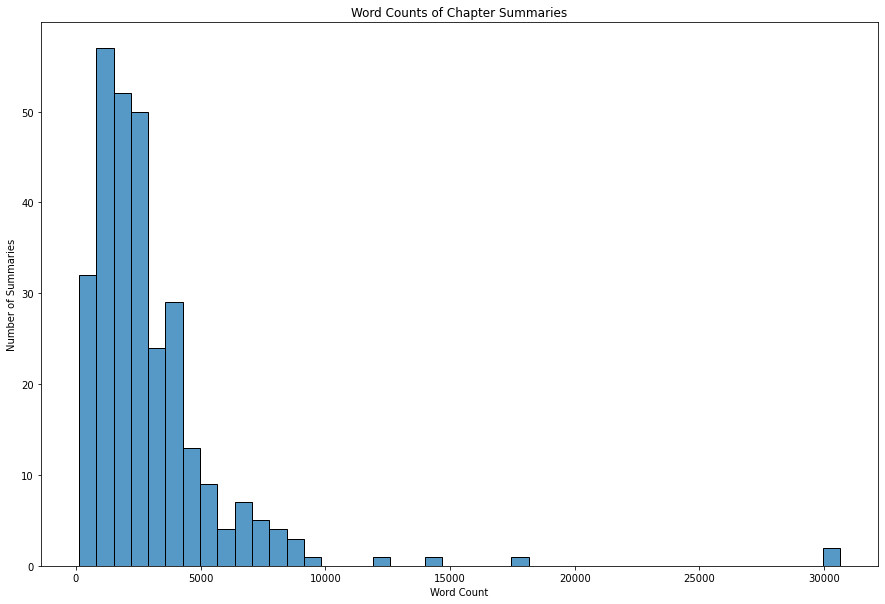

In [25]:
plt.figure(figsize=(15,10))
plt.xlabel('Word Count')
plt.ylabel('Number of Summaries')
plt.title('Word Counts of Chapter Summaries')
sns.histplot(summary_word_cts);

In [26]:
chapter_word_cts = []

for i in df.index:
  chapter_word_cts.append(len(df.iloc[i]['chapter_text']))

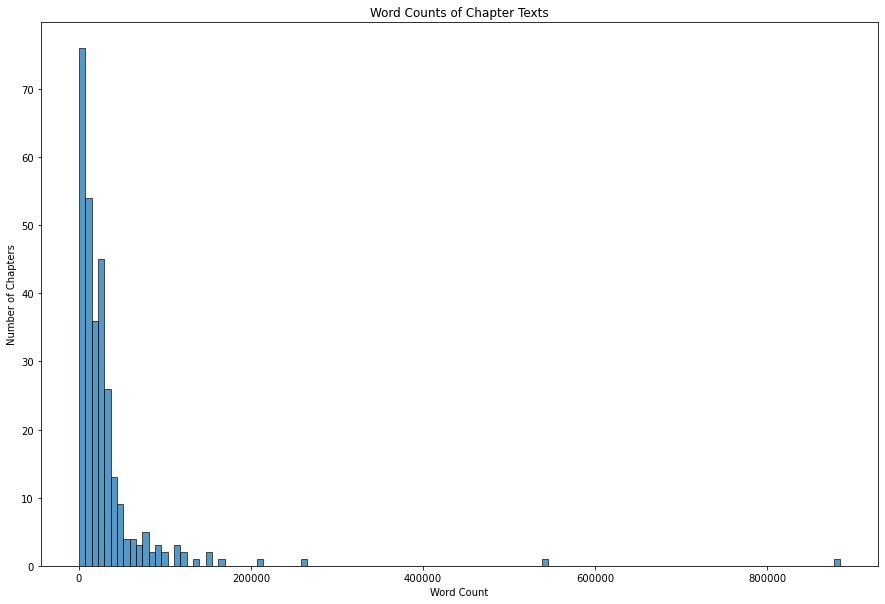

In [27]:
plt.figure(figsize=(15,10))
plt.xlabel('Word Count')
plt.ylabel('Number of Chapters')
plt.title('Word Counts of Chapter Texts')
sns.histplot(chapter_word_cts);

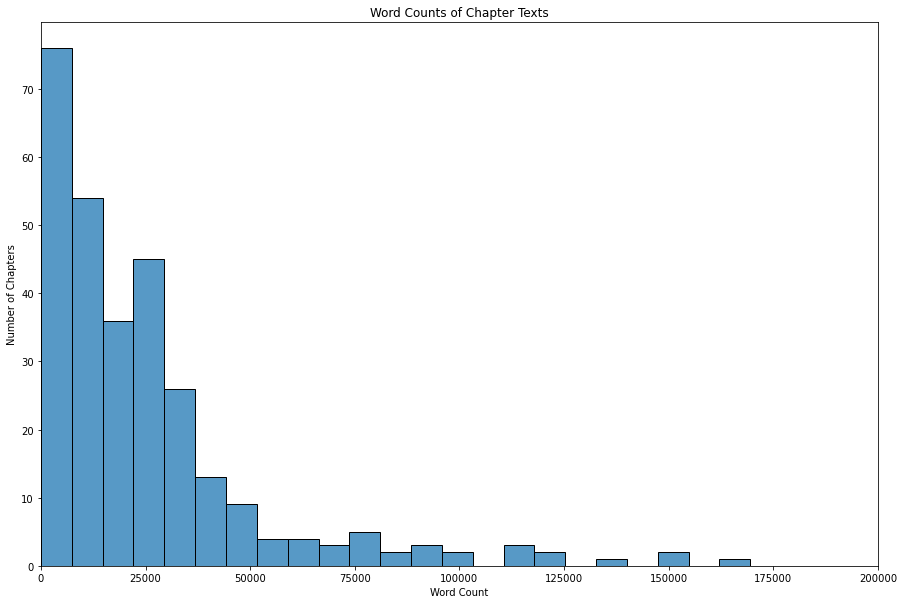

In [28]:
plt.figure(figsize=(15,10))
plt.xlabel('Word Count')
plt.ylabel('Number of Chapters')
plt.title('Word Counts of Chapter Texts')
plt.xlim(0, 200000)
sns.histplot(chapter_word_cts);

## Most Common Words

### Most common words in all chapter summaries (excluding very common words likely to be found in all summaries/texts)

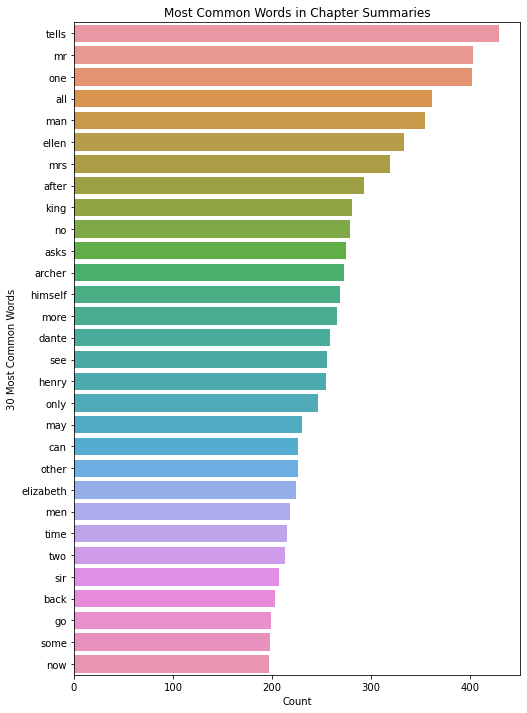

In [39]:
sum_texts = []
for i in df.index:
    text = df.iloc[i]['chapter_summary']
    text_plain = text.lower().replace(',', '').replace('.', '').replace('!', '')
    words = text_plain.split(' ')
    stop_words = [
        'the', 'to', 'is', 'of', 'and', 'in', 'her', 'him', 'his', 'hers', 'my', 'this', 'that', 'them', 'they', 'a', 'in', 'he', 'she', 'not', 'with', 'at', 'as', 'but', 'by', 'on',
        'was', 'it', 'from', 'an', 'who', 'be', 'has', 'which', 'what', 'are', 'had', 'when', 'for', 'their', '', ' ', 'will', 'have', 'about', 'been', 'says', 'so', 'then', 'if', 
        'would', 'does', 'also', 'there', 'into', 'up', 'out', 'because', 'where', 'how', 'or'
        ]
    text_words = [word for word in words if not word in stop_words]
    sum_texts = sum_texts + text_words
sum_word_counts = Counter(sum_texts).most_common(30)

sum_common_words = []
sum_counts = []
for w in sum_word_counts:
    sum_common_words.append(w[0])
    sum_counts.append(w[1])

plt.figure(figsize=(8,12))
sns.barplot(y=sum_common_words, x=sum_counts, orient='h')
# plt.xticks(rotation=45)
plt.ylabel('30 Most Common Words')
plt.xlabel('Count')
plt.title('Most Common Words in Chapter Summaries');

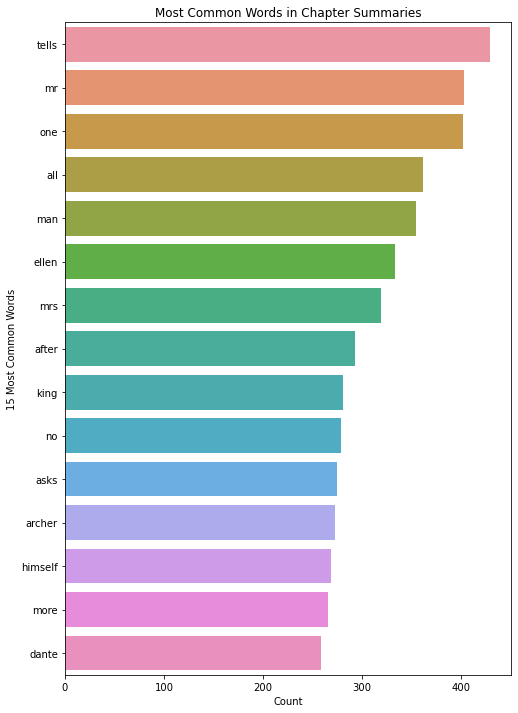

In [40]:
sum_texts = []
for i in df.index:
    text = df.iloc[i]['chapter_summary']
    text_plain = text.lower().replace(',', '').replace('.', '').replace('!', '')
    words = text_plain.split(' ')
    stop_words = [
        'the', 'to', 'is', 'of', 'and', 'in', 'her', 'him', 'his', 'hers', 'my', 'this', 'that', 'them', 'they', 'a', 'in', 'he', 'she', 'not', 'with', 'at', 'as', 'but', 'by', 'on',
        'was', 'it', 'from', 'an', 'who', 'be', 'has', 'which', 'what', 'are', 'had', 'when', 'for', 'their', '', ' ', 'will', 'have', 'about', 'been', 'says', 'so', 'then', 'if', 
        'would', 'does', 'also', 'there', 'into', 'up', 'out', 'because', 'where', 'how', 'or'
        ]
    text_words = [word for word in words if not word in stop_words]
    sum_texts = sum_texts + text_words
sum_word_counts = Counter(sum_texts).most_common(15)

sum_common_words = []
sum_counts = []
for w in sum_word_counts:
    sum_common_words.append(w[0])
    sum_counts.append(w[1])

plt.figure(figsize=(8,12))
sns.barplot(y=sum_common_words, x=sum_counts, orient='h')
plt.ylabel('15 Most Common Words')
plt.xlabel('Count')
plt.title('Most Common Words in Chapter Summaries');

### Most common words in all chapter texts (excluding very common words likely to be found in all summaries/texts)

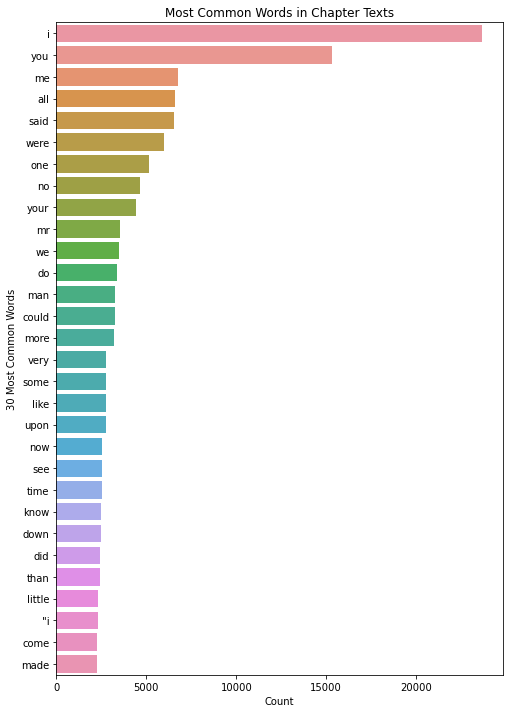

In [41]:
chap_texts = []
for i in df.index:
    text = df.iloc[i]['chapter_text']
    text_plain = text.lower().replace(',', '').replace('.', '').replace('!', '')
    words = text_plain.split(' ')
    stop_words = [
        'the', 'to', 'is', 'of', 'and', 'in', 'her', 'him', 'his', 'hers', 'my', 'this', 'that', 'them', 'they', 'a', 'in', 'he', 'she', 'not', 'with', 'at', 'as', 'but', 'by', 'on',
        'was', 'it', 'from', 'an', 'who', 'be', 'has', 'which', 'what', 'are', 'had', 'when', 'for', 'their', '', ' ', 'will', 'have', 'about', 'been', 'says', 'so', 'then', 'if', 
        'would', 'does', 'also', 'there', 'into', 'up', 'out', 'because', 'where', 'how', 'or'
        ]
    text_words = [word for word in words if not word in stop_words]
    chap_texts = chap_texts + text_words
chap_word_counts = Counter(chap_texts).most_common(30)

chap_common_words = []
chap_counts = []
for w in chap_word_counts:
    chap_common_words.append(w[0])
    chap_counts.append(w[1])

plt.figure(figsize=(8,12))
sns.barplot(y=chap_common_words, x=chap_counts)
plt.ylabel('30 Most Common Words')
plt.xlabel('Count')
plt.title('Most Common Words in Chapter Texts');

#### Most common words in chapter texts with more common stop words excluded

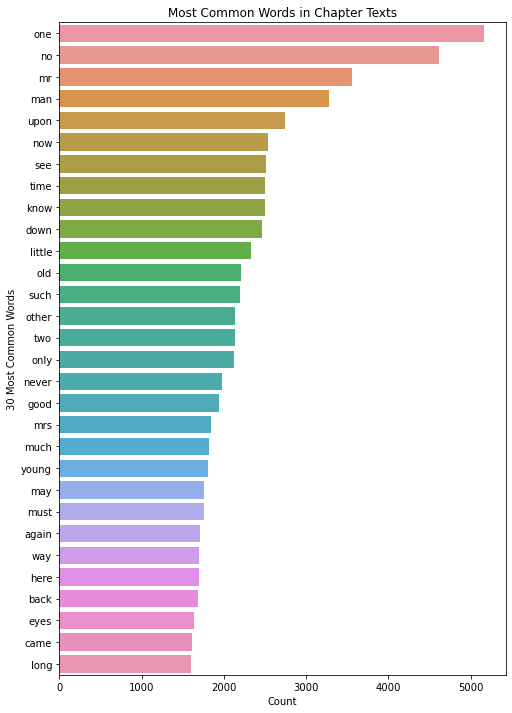

In [42]:
chap_texts = []
for i in df.index:
    text = df.iloc[i]['chapter_text']
    text_plain = text.lower().replace(',', '').replace('.', '').replace('!', '')
    words = text_plain.split(' ')
    stop_words = [
        'the', 'to', 'is', 'of', 'and', 'in', 'her', 'him', 'his', 'hers', 'my', 'this', 'that', 'them', 'they', 'a', 'in', 'he', 'she', 'not', 'with', 'at', 'as', 'but', 'by', 'on',
        'was', 'it', 'from', 'an', 'who', 'be', 'has', 'which', 'what', 'are', 'had', 'when', 'for', 'their', '', ' ', 'will', 'have', 'about', 'been', 'says', 'so', 'then', 'if', 
        'would', 'does', 'also', 'there', 'into', 'up', 'out', 'because', 'where', 'how', 'or', 'i', 'you', 'me', 'all', 'said', 'were', 'your', 'we', 'do', 'could', 'very', 'some', 'did',
        'than', '"i', 'come', 'more', 'like', 'made', 'any', 'before', 'am', 'should', 'himself', 'herself', 'after', 'over', 'go', 'these', 'say', 'says', 'went', 'can'
        ]
    text_words = [word for word in words if not word in stop_words]
    chap_texts = chap_texts + text_words
chap_word_counts = Counter(chap_texts).most_common(30)

chap_common_words = []
chap_counts = []
for w in chap_word_counts:
    chap_common_words.append(w[0])
    chap_counts.append(w[1])

plt.figure(figsize=(8,12))
sns.barplot(y=chap_common_words, x=chap_counts)
plt.ylabel('30 Most Common Words')
plt.xlabel('Count')
plt.title('Most Common Words in Chapter Texts');

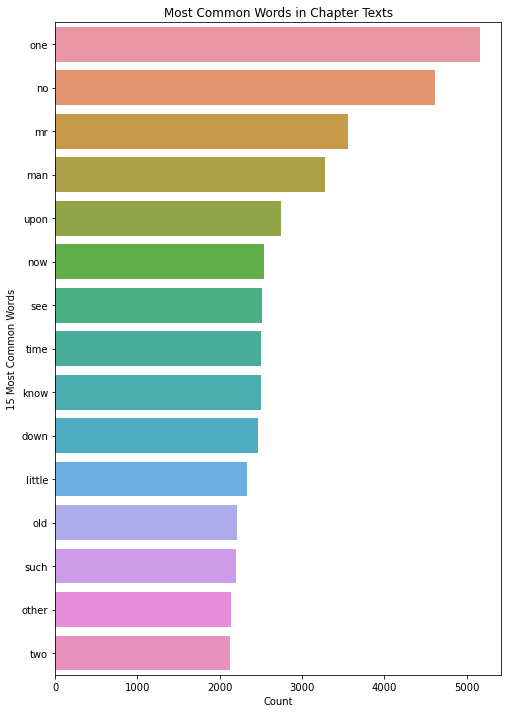

In [43]:
chap_texts = []
for i in df.index:
    text = df.iloc[i]['chapter_text']
    text_plain = text.lower().replace(',', '').replace('.', '').replace('!', '')
    words = text_plain.split(' ')
    stop_words = [
        'the', 'to', 'is', 'of', 'and', 'in', 'her', 'him', 'his', 'hers', 'my', 'this', 'that', 'them', 'they', 'a', 'in', 'he', 'she', 'not', 'with', 'at', 'as', 'but', 'by', 'on',
        'was', 'it', 'from', 'an', 'who', 'be', 'has', 'which', 'what', 'are', 'had', 'when', 'for', 'their', '', ' ', 'will', 'have', 'about', 'been', 'says', 'so', 'then', 'if', 
        'would', 'does', 'also', 'there', 'into', 'up', 'out', 'because', 'where', 'how', 'or', 'i', 'you', 'me', 'all', 'said', 'were', 'your', 'we', 'do', 'could', 'very', 'some', 'did',
        'than', '"i', 'come', 'more', 'like', 'made', 'any', 'before', 'am', 'should', 'himself', 'herself', 'after', 'over', 'go', 'these', 'say', 'says', 'went', 'can'
        ]
    text_words = [word for word in words if not word in stop_words]
    chap_texts = chap_texts + text_words
chap_word_counts = Counter(chap_texts).most_common(15)

chap_common_words = []
chap_counts = []
for w in chap_word_counts:
    chap_common_words.append(w[0])
    chap_counts.append(w[1])

plt.figure(figsize=(8,12))
sns.barplot(y=chap_common_words, x=chap_counts)
plt.ylabel('15 Most Common Words')
plt.xlabel('Count')
plt.title('Most Common Words in Chapter Texts');